<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [9]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
import matplotlib
%matplotlib inline

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [2]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-06-29 08:10:38--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.07s   

2021-06-29 08:10:38 (301 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

### Convert to date time object


In [5]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [6]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [7]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB  anaconda
    _py-xgboost-mutex-2.0      |            cpu_0           9 KB  anaconda
    _pytorch_select-0.1        |            cpu_0           2 KB  anaconda
    absl-py-0.10.0             |           py37_0         169 KB  anaconda
    aiohttp-3.6.3              |   py37h7b6447c_0         626 KB  anaconda
    argon2-cffi-20.1.0         |   py37h7b6447c_1         

tifffile-2020.10.1   | 260 KB    | ##################################### | 100% 
pytest-6.1.1         | 418 KB    | ##################################### | 100% 
bleach-3.2.1         | 111 KB    | ##################################### | 100% 
pywavelets-1.1.1     | 4.4 MB    | ##################################### | 100% 
plotly-4.11.0        | 5.9 MB    | ##################################### | 100% 
xz-5.2.5             | 438 KB    | ##################################### | 100% 
cloudpickle-1.6.0    | 29 KB     | ##################################### | 100% 
pytables-3.6.1       | 1.5 MB    | ##################################### | 100% 
jeepney-0.4.3        | 22 KB     | ##################################### | 100% 
xlrd-1.2.0           | 186 KB    | ##################################### | 100% 
python-dateutil-2.8. | 224 KB    | ##################################### | 100% 
gast-0.3.3           | 14 KB     | ##################################### | 100% 
pickleshare-0.7.5    | 13 KB

libpng-1.6.37        | 364 KB    | ##################################### | 100% 
more-itertools-8.5.0 | 42 KB     | ##################################### | 100% 
sqlite-3.33.0        | 2.0 MB    | ##################################### | 100% 
pymssql-2.1.5        | 228 KB    | ##################################### | 100% 
threadpoolctl-2.1.0  | 16 KB     | ##################################### | 100% 
libprotobuf-3.13.0.1 | 2.3 MB    | ##################################### | 100% 
ipywidgets-7.5.1     | 102 KB    | ##################################### | 100% 
jsonschema-3.2.0     | 45 KB     | ##################################### | 100% 
pyparsing-2.4.7      | 64 KB     | ##################################### | 100% 
toml-0.10.1          | 20 KB     | ##################################### | 100% 
pyasn1-modules-0.2.8 | 67 KB     | ##################################### | 100% 
tensorboard-2.2.1    | 2.5 MB    | ##################################### | 100% 
gstreamer-1.14.0     | 3.8 M

c-ares-1.16.1        | 112 KB    | ##################################### | 100% 
async_generator-1.10 | 38 KB     | ##################################### | 100% 
biopython-1.78       | 2.6 MB    | ##################################### | 100% 
parso-0.7.0          | 71 KB     | ##################################### | 100% 
_py-xgboost-mutex-2. | 9 KB      | ##################################### | 100% 
ld_impl_linux-64-2.3 | 645 KB    | ##################################### | 100% 
libxml2-2.9.10       | 1.3 MB    | ##################################### | 100% 
freetds-1.00.97      | 2.4 MB    | ##################################### | 100% 
aiohttp-3.6.3        | 626 KB    | ##################################### | 100% 
pillow-8.0.0         | 686 KB    | ##################################### | 100% 
s3transfer-0.3.3     | 90 KB     | ##################################### | 100% 
fontconfig-2.13.0    | 291 KB    | ##################################### | 100% 
cx_oracle-8.0.1      | 186 K

In [11]:
!conda uninstall matplotlib

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  removed specs:
    - matplotlib


The following packages will be REMOVED:

  _libgcc_mutex-0.1-main
  _py-xgboost-mutex-2.0-cpu_0
  _pytorch_select-0.1-cpu_0
  absl-py-0.10.0-py37_0
  aiohttp-3.6.3-py37h7b6447c_0
  arcgis-1.6.0-py37h39e3cac_1
  argon2-cffi-20.1.0-py37h7b6447c_1
  astor-0.8.1-py37_0
  astropy-4.0.2-py37h7b6447c_0
  astunparse-1.6.3-py_0
  async-timeout-3.0.1-py37_0
  async_generator-1.10-py37h28b3542_0
  attrs-20.2.0-py_0
  backcall-0.2.0-py_0
  beautifulsoup4-4.9.3-pyhb0f4dca_0
  biopython-1.78-py37h7b6447c_0
  blas-1.0-mkl
  bleach-3.2.1-py_0
  blinker-1.4-py37_0
  blosc-1.19.0-hd408876_0
  bokeh-2.2.3-py37_0
  boto3-1.16.0-py_0
  botocore-1.19.1-py_0
  brotlipy-0.7.0-py37h7b6447c_1000
  bzip2-1.0.8-h7b6447c_0
  c-ares-1.16.1-h7b6447c_0
  cachetools-4.1.1-py_0
  cffi-1.14.3-py37he30daa8_0
  chardet-3.0.4-py37_1003
  click-7.1.2-py_0
  cloudpickle-1.6.0-py_0
  cryp

done


In [13]:
!conda install matplotlib=3.1.3

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.7-main

  added / updated specs:
    - matplotlib=3.1.3


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _libgcc_mutex-0.1          |             main           3 KB
    _openmp_mutex-4.5          |            1_gnu          22 KB
    blas-1.0                   |              mkl           6 KB
    cycler-0.10.0              |           py37_0          13 KB
    dbus-1.13.18               |       hb2f20db_0         504 KB
    expat-2.4.1                |       h2531618_2         168 KB
    fontconfig-2.13.1          |       h6c09931_0         250 KB
    freetype-2.10.4            |       h5ab3b9f_0         596 KB
    glib-2.6

freetype-2.10.4      | 596 KB    | ##################################### | 100% 
_libgcc_mutex-0.1    | 3 KB      | ##################################### | 100% 
libstdcxx-ng-9.3.0   | 3.1 MB    | ##################################### | 100% 
zlib-1.2.11          | 103 KB    | ##################################### | 100% 
libgcc-ng-9.3.0      | 4.8 MB    | ##################################### | 100% 
mkl-2021.2.0         | 144.3 MB  | ##################################### | 100% 
libedit-3.1.20210216 | 167 KB    | ##################################### | 100% 
mkl-service-2.3.0    | 55 KB     | ##################################### | 100% 
matplotlib-3.1.3     | 21 KB     | ##################################### | 100% 
mkl_fft-1.3.0        | 170 KB    | ##################################### | 100% 
expat-2.4.1          | 168 KB    | ##################################### | 100% 
python-3.7.10        | 44.0 MB   | ##################################### | 100% 
intel-openmp-2021.2. | 1.3 M

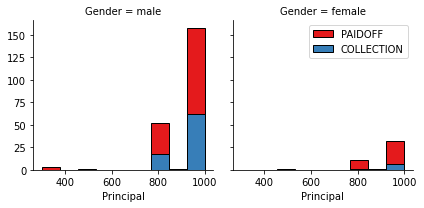

In [14]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

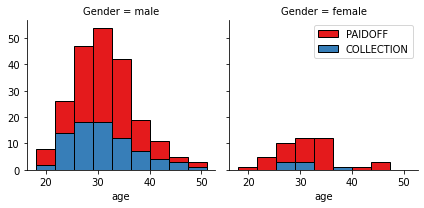

In [15]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


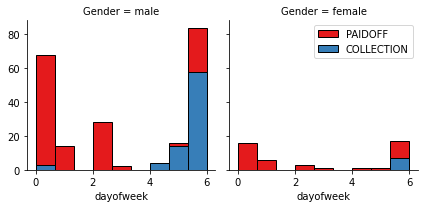

In [16]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [17]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [18]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [19]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [22]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)
#Should be bachelor

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [23]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [71]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [72]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our lables?


In [130]:
y = df['loan_status'].values
y[0:5]

array([1, 1, 1, 1, 1])

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [74]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [32]:
!pip install scikit-learn==0.23.1

     |████████████████████████████████| 6.8 MB 11.0 MB/s eta 0:00:01
     |████████████████████████████████| 28.5 MB 54.5 MB/s eta 0:00:01K     |▉                               | 706 kB 54.5 MB/s eta 0:00:01��████▊                       | 7.7 MB 54.5 MB/s eta 0:00:01��████████████████████▉          | 19.4 MB 54.5 MB/s eta 0:00:01
     |████████████████████████████████| 303 kB 72.3 MB/s eta 0:00:01


In [33]:
from sklearn import preprocessing

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
from sklearn import metrics

In [38]:
# Training the model for different k's and use accuracy to determine the best k
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286])

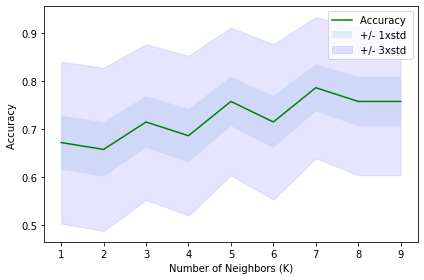

In [40]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="blue")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [41]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7857142857142857 with k= 7


# Decision Tree


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
loanTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [45]:
loanTree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [46]:
predTree = loanTree.predict(X_test)

In [47]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.6142857142857143


In [48]:
# Could hyper parameter tune and change features

# Support Vector Machine


In [49]:
from sklearn import svm

In [146]:
clf = svm.SVC(kernel='rbf', probability=True)
clf_2 = svm.SVC(kernel='linear', probability=True)

In [51]:
clf.fit(X_train, y_train)
clf_2.fit(X_train, y_train)

SVC(kernel='linear')

In [52]:
yhat = clf.predict(X_test)
yhat_2 = clf_2.predict(X_test)

In [53]:
print("rbf's Accuracy: ", metrics.accuracy_score(y_test, yhat))
print("linear's Accuracy: ", metrics.accuracy_score(y_test, yhat_2))

rbf's Accuracy:  0.7428571428571429
linear's Accuracy:  0.7857142857142857


# Logistic Regression


In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)

In [56]:
yhat = LR.predict(X_test)

In [57]:
print("LogisticRegression's Accuracy: ", metrics.accuracy_score(y_test, yhat))

LogisticRegression's Accuracy:  0.6857142857142857


# Model Evaluation using Test set


In [59]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:


In [60]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-06-29 08:59:46--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-06-29 08:59:46 (51.9 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [94]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [95]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [96]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])

In [97]:
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [98]:
test_df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        1.000000
High School or Below  PAIDOFF        0.523810
                      COLLECTION     0.476190
Master or Above       PAIDOFF        1.000000
college               PAIDOFF        0.826087
                      COLLECTION     0.173913
Name: loan_status, dtype: float64

In [99]:
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature,pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [100]:
X2 = test_Feature.fillna(0)
X2[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [120]:
y2 = test_df['loan_status'].values
y2[0:5]

array([1, 1, 1, 1, 1])

In [102]:
X2= preprocessing.StandardScaler().fit(X2).transform(X2)
X2[0:5]

array([[ 0.49362588,  0.92844966,  3.05981865,  1.97714211, -1.30384048,
         2.39791576, -0.79772404, -0.86135677],
       [-3.56269116, -1.70427745,  0.53336288, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404, -0.86135677],
       [ 0.49362588,  0.92844966,  1.88080596,  1.97714211,  0.76696499,
        -0.41702883,  1.25356634, -0.86135677],
       [ 0.49362588,  0.92844966, -0.98251057, -0.50578054,  0.76696499,
        -0.41702883, -0.79772404,  1.16095912],
       [-0.66532184, -0.78854628, -0.47721942, -0.50578054,  0.76696499,
         2.39791576, -0.79772404, -0.86135677]])

In [131]:
neigh = KNeighborsClassifier(n_neighbors = 7).fit(X,y)

In [132]:
yhat_knn = neigh.predict(X2)

In [133]:
yhat_knn

array([1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1])

In [135]:
loanTree.fit(X,y)
predTree = loanTree.predict(X2)

In [147]:
clf.fit(X,y)
clf_2.fit(X,y)
yhat_rbf = clf.predict(X2)
yhat_linear = clf_2.predict(X2)

In [148]:
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X,y)
yhat_lr = LR.predict(X2)

In [150]:
yhat_knn_prob = neigh.predict_proba(X2)
predTree_prob = loanTree.predict_proba(X2)
yhat_rbf_prob = clf.predict_proba(X2)
yhat_linear_prob = clf_2.predict_proba(X2)
yhat_lr_prob = LR.predict_proba(X2)

In [108]:
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score

In [119]:
#Converting output  to binary to see likelyhood to pay off
#y3 = test_df['loan_status'].replace(to_replace=['COLLECTION','PAIDOFF'], value=[0,1],inplace=True)

In [151]:
print("yhat_knn", log_loss(y2, yhat_knn_prob))
print("predTree",log_loss(y2, predTree_prob))
print("yhat_rbf",log_loss(y2, yhat_rbf_prob))
print("yhat_linear",log_loss(y2, yhat_linear_prob))
print("yhat_lr",log_loss(y2, yhat_lr_prob))

yhat_knn 1.110076176019243
predTree 0.9910204875489526
yhat_rbf 0.5427896805960647
yhat_linear 0.572638012998531
yhat_lr 0.5566084946309207


In [139]:
print("yhat_knn", jaccard_score(y2, yhat_knn,pos_label=0))
print("predTree",jaccard_score(y2, predTree,pos_label=0))
print("yhat_rbf",jaccard_score(y2, yhat_rbf,pos_label=0))
print("yhat_linear",jaccard_score(y2, yhat_linear,pos_label=0))
print("yhat_lr",jaccard_score(y2, yhat_lr,pos_label=0))

yhat_knn 0.21052631578947367
predTree 0.2
yhat_rbf 0.0
yhat_linear 0.0
yhat_lr 0.0


In [140]:
print("yhat_knn", f1_score(y2, yhat_knn, average='weighted'))
print("predTree",f1_score(y2, predTree, average='weighted'))
print("yhat_rbf",f1_score(y2, yhat_rbf, average='weighted'))
print("yhat_linear",f1_score(y2, yhat_linear, average='weighted'))
print("yhat_lr",f1_score(y2, yhat_lr, average='weighted'))

yhat_knn 0.7001989201477693
predTree 0.7283950617283951
yhat_rbf 0.6212664277180406
yhat_linear 0.6304176516942475
yhat_lr 0.6304176516942475


# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard    |    F1-score |   LogLoss |
|--------------------|------------|-------------|-----------|
| KNN                | 0.21       | 0.70        | 1.11      |
| Decision Tree      | 0.20       | 0.72        | 0.99      |
| SVM                | 0.00       | 0.63        | 0.57      |
| LogisticRegression | 0.00       | 0.63        | 0.55      |


A Jaccard value of 1 indicates the entire set of predicted labels match with the true set of labels, so the value closer to 1 the better
The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0.
In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1. In ourcase we have used paidoff as our target, perhaps we should have used collection.

Thus the overall most accurate model is the decision tree, prior to hyperparameter tuning and further feature selection

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description |
|---|---|---|---|
| 2020-10-27 | 2.1 | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27 | 2.0 | Malika Singla | Added lab to GitLab |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
